(1) 데이터를 탐색하고 결과를 제시하시오.

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("hotel_bookings.csv")
data.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [3]:
data['deposit_type'].value_counts()

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

In [4]:
data.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [5]:
data.groupby(data['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

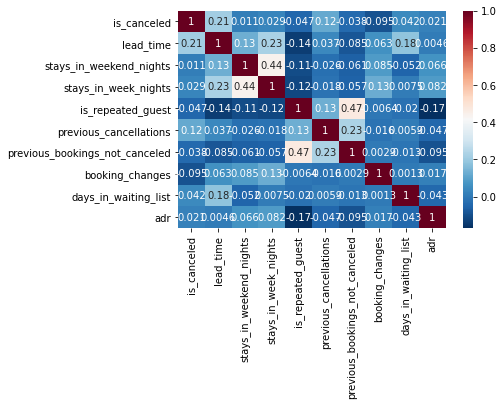

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
data_corr=data.drop(columns='deposit_type').corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

큰 상관관계가 있는 컬럼은 없는 것으로 파악

y변수를 포함한 각 변수의 분포를 살펴보았다.

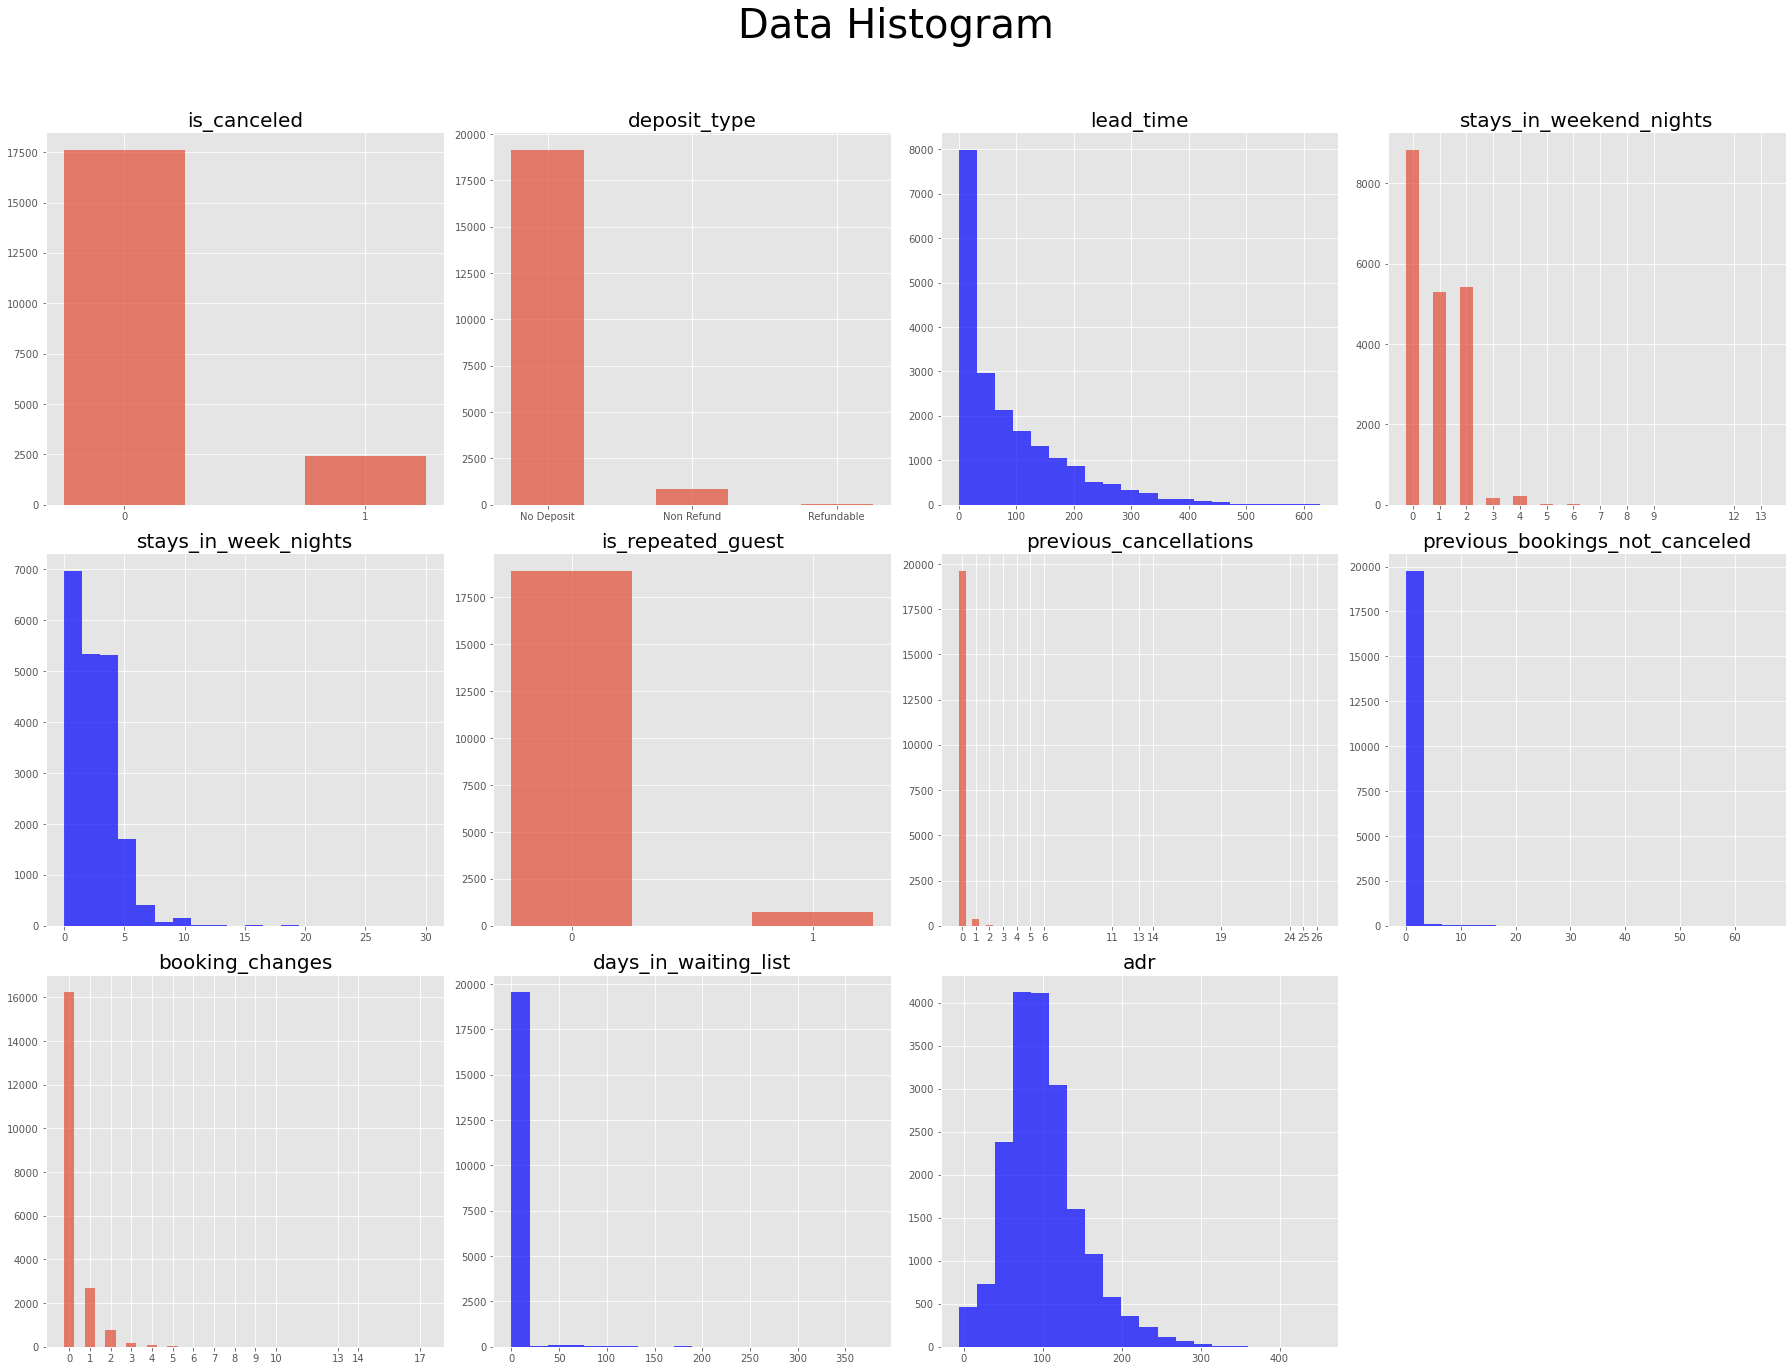

In [8]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 40)

# id는 제외하고 시각화
cols = data.columns
for i in range(len(cols)):
    plt.subplot(3, 4, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(data[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = data[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

y변수인 deposit_type은 No Depsoit에 값이 밀집되어있는 것을 확인하였다.

(2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [9]:
data.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [10]:
print(round(5/len(data)*100,2)) #1미만으로 삭제
print(round(358/len(data)*100,2)) #0,1로 구성된 변수이므로 최빈값 대체
print(round(1063/len(data)*100,2)) #연속형이므로 평균값으로 대체함

0.03
1.79
5.32


In [11]:
data_nonnull=data
data_nonnull.dropna(subset=['lead_time'], axis=0, inplace=True)
data_nonnull.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [13]:
data_nonnull['is_repeated_guest']=data_nonnull['is_repeated_guest'].fillna(0)
data_nonnull.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [16]:
data_nonnull=data_nonnull.groupby('deposit_type').fillna(data_nonnull.groupby('deposit_type').mean(), inplace=True)

KeyError: 'deposit_type'

In [17]:
data_nonnull.isna().sum()

is_canceled                          0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64